<a href="https://colab.research.google.com/github/moimigueldev/tensorflow-ztm/blob/main/medical_cost_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NN Deep Leaning

Based on the information given, create a neural network model that predicts medical cost based on provided features

In [153]:
# Constants
RANDOM_STATE = 42
DATA_URL = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'


In [154]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder



In [155]:
insurance = pd.read_csv(DATA_URL)
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Explore data

In [156]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [157]:
 # Check for null/nan values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [158]:
categorical = [x for x in insurance.columns if insurance[x].dtype=='O']
numerical = [x for x in insurance.columns if insurance[x].dtype !='O']
numerical.remove('charges')
categorical, numerical

(['sex', 'smoker', 'region'], ['age', 'bmi', 'children'])

The data is straight forward. There are not missing values and it is cleaned. Ready for us to create a model without any transformation to the data first.

### Crate first models



### Model 1

In [159]:
# One hot encode dataframe
encoded_insurance = pd.get_dummies(insurance)


# Split into X and y
X = encoded_insurance.drop(['charges'], axis=1)
y = encoded_insurance['charges']

# create test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
X_train.shape, X_test.shape

((1070, 11), (268, 11))

In [160]:
tf.random.set_seed(RANDOM_STATE)

model_1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics='mae')
history_1 = model_1.fit(X_train, y_train, epochs=100, verbose=False)

In [161]:
model_1.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [162]:
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7000.7295 - mae: 7000.7295


[7000.7294921875, 7000.7294921875]

In [163]:
y_pred = model_1.predict(X_test)
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=7000.73>

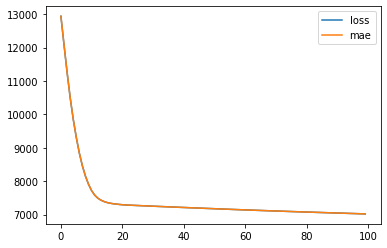

In [164]:
pd.DataFrame(history_1.history).plot()

**model_1** gives us an mae of `$7000` which compared to the median(`$8487`) and mean(`$12968`) of our true labels is a lot. model needs to be improved


### Model_2

let's change the optimizer to `Adam` and play with the learning rate epochs until we get better results

9/9 [==============================] - 0s 2ms/step - loss: 5921.4116 - mae: 5921.4116


[5921.41162109375, 5921.41162109375]

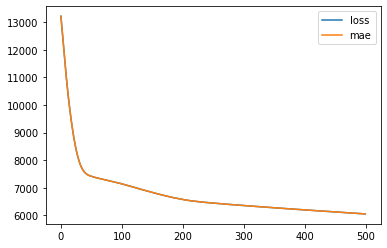

In [165]:
tf.random.set_seed(RANDOM_STATE)

model_2 = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics='mae')
history_2 = model_2.fit(X_train, y_train, epochs=500, verbose=False)
pd.DataFrame(history_2.history).plot()
model_2.evaluate(X_test, y_test)

By changing the optimzer to Adam and adjusting the learning rate and epochs, we were able to get a better result of around 6k compared to 7K in our first model

### Model_3

Let's try to play around with hidden layers and adjust the number of neaurons

<!-- 9/9 [==============================] - 0s 3ms/step - loss: 7000.7295 - mae: 7000.7295
[7000.7294921875, 7000.7294921875] -->

9/9 [==============================] - 0s 3ms/step - loss: 3186.8457 - mae: 3186.8457


[3186.845703125, 3186.845703125]

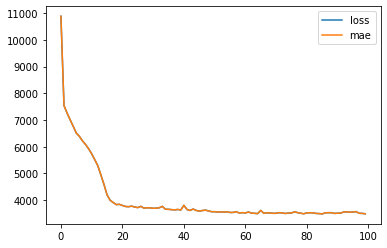

In [166]:
tf.random.set_seed(RANDOM_STATE)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ]
)

model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics='mae')
history_3 = model_3.fit(X_train, y_train, epochs=100, verbose=False)
pd.DataFrame(history_3.history).plot()
model_3.evaluate(X_test, y_test)

By adding a hidden layer with 10 neurons, we were able to reduce the mae and now we can do less iterations



In [167]:
# Create helper functions for evaluation
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))


### Comparing models

In [168]:
models = [
          ['model_1', mae(y_test, model_1.predict(X_test)).numpy(), mse(y_test, model_1.predict(X_test)).numpy()],
          ['model_2', mae(y_test, model_2.predict(X_test)).numpy(), mse(y_test, model_2.predict(X_test)).numpy()],
          ['model_3', mae(y_test, model_3.predict(X_test)).numpy(), mse(y_test, model_3.predict(X_test)).numpy()],
]

pd.DataFrame(models, columns=['Name', 'MAE', 'MSE'])

,Name,MAE,MSE
0,model_1,7000.729980,163108656.0
1,model_2,5921.411621,142301056.0
2,model_3,3186.845215,43500172.0


After creating 3 different models our 3rd model performed the best. 
Let's try to normalize the data to see if we can improve our models


# Normalize Data

In [169]:
ct = make_column_transformer(
    (MinMaxScaler(), numerical),
    (OneHotEncoder(), categorical)
)


# Create X & y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization and one hot encoder
X_train_normal = ct.transform(X_train)
X_test_normal =  ct.transform(X_test)



### Model 4 

create a model with the normalized data

9/9 [==============================] - 0s 2ms/step - loss: 3163.0986 - mae: 3163.0986


[3163.0986328125, 3163.0986328125]

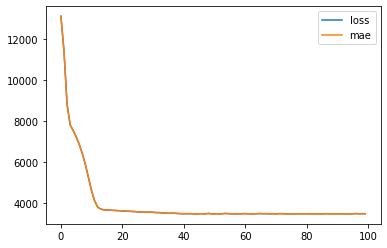

In [170]:
tf.random.set_seed(RANDOM_STATE)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ]
)

model_4.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics='mae')
history_4 = model_4.fit(X_train_normal, y_train, epochs=100, verbose=False)
pd.DataFrame(history_4.history).plot()
model_4.evaluate(X_test_normal, y_test)

With our normalized model we are able to converge much faster and smoother comparard to model_3

### Summary 
**model_4** was our best perfoming model



In [171]:
models.append(
    ['model_4', mae(y_test, model_4.predict(X_test_normal)).numpy(), mse(y_test, model_4.predict(X_test_normal)).numpy()]
)

pd.DataFrame(models, columns=['Name', 'MAE', 'MSE'])

,Name,MAE,MSE
0,model_1,7000.729980,163108656.0
1,model_2,5921.411621,142301056.0
2,model_3,3186.845215,43500172.0
3,model_4,3163.098877,43401788.0
